In [215]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
dfhead = pd.read_csv('NBAFutures1.csv')
dftail = pd.read_csv('NBAFuturesTest1.csv')
df = dfhead.append(dftail, ignore_index = True)
df.head()

,Unnamed: 0,Player,Year,Pos,Age,Tm,G,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,PTS2,TRB2,AST2,STL2,BLK2
0,0,Kareem Abdul-Jabbar,1980,C,32,LAL,82,38.3,10.2,16.9,...,1.0,3.4,3.6,2.6,24.8,26.2,10.3,3.4,0.7,2.9
1,1,Kareem Abdul-Jabbar,1981,C,33,LAL,80,37.2,10.5,18.2,...,0.7,2.9,3.1,3.1,26.2,23.9,8.7,3.0,0.8,2.7
2,2,Kareem Abdul-Jabbar,1982,C,34,LAL,76,35.2,9.9,17.1,...,0.8,2.7,3.0,2.9,23.9,21.8,7.5,2.5,0.8,2.2
3,3,Kareem Abdul-Jabbar,1983,C,35,LAL,79,32.3,9.1,15.5,...,0.8,2.2,2.5,2.8,21.8,21.5,7.3,2.6,0.7,1.8
4,4,Kareem Abdul-Jabbar,1984,C,36,LAL,80,32.8,9.0,15.5,...,0.7,1.8,2.8,2.6,21.5,22.0,7.9,3.2,0.8,2.1


In [216]:
df = df.drop(['Unnamed: 0'], axis=1)

In [217]:
df = df[['Player','Year','Pos','Age','PTS','TRB','AST','STL','BLK','PTS2','TRB2','AST2','STL2','BLK2']]

In [218]:
dum1 = pd.get_dummies(df['Pos'])
df1 = pd.concat([df, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1 = df1.set_index('Player')
df1.head()

,Year,Age,PTS,TRB,AST,STL,BLK,PTS2,TRB2,AST2,STL2,BLK2,C,PF,PG,SF,SG
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,24.8,10.8,4.5,1.0,3.4,26.2,10.3,3.4,0.7,2.9,1,0,0,0,0
Kareem Abdul-Jabbar,1981,33,26.2,10.3,3.4,0.7,2.9,23.9,8.7,3.0,0.8,2.7,1,0,0,0,0
Kareem Abdul-Jabbar,1982,34,23.9,8.7,3.0,0.8,2.7,21.8,7.5,2.5,0.8,2.2,1,0,0,0,0
Kareem Abdul-Jabbar,1983,35,21.8,7.5,2.5,0.8,2.2,21.5,7.3,2.6,0.7,1.8,1,0,0,0,0
Kareem Abdul-Jabbar,1984,36,21.5,7.3,2.6,0.7,1.8,22.0,7.9,3.2,0.8,2.1,1,0,0,0,0


In [219]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['PTS2','TRB2','AST2','STL2','BLK2']
for du in dum:
    cols.remove(du)

In [220]:
cols_at_end = ['PTS2','BLK2','STL2','AST2','TRB2']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
check = df1.copy(deep=True)
df1.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,24.8,10.8,4.5,1.0,3.4,1,0,0,0,0,26.2,2.9,0.7,3.4,10.3
Kareem Abdul-Jabbar,1981,33,26.2,10.3,3.4,0.7,2.9,1,0,0,0,0,23.9,2.7,0.8,3.0,8.7
Kareem Abdul-Jabbar,1982,34,23.9,8.7,3.0,0.8,2.7,1,0,0,0,0,21.8,2.2,0.8,2.5,7.5
Kareem Abdul-Jabbar,1983,35,21.8,7.5,2.5,0.8,2.2,1,0,0,0,0,21.5,1.8,0.7,2.6,7.3
Kareem Abdul-Jabbar,1984,36,21.5,7.3,2.6,0.7,1.8,1,0,0,0,0,22.0,2.1,0.8,3.2,7.9


In [221]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.898146,1.407294,2.542378,2.635391,1.235413,0.536671,5.430987,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.764691,4.662253,0.008694,0.721331,2.471482
Kareem Abdul-Jabbar,-1.809213,1.662855,2.772446,2.443237,0.669076,-0.083946,4.504145,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.400079,4.283902,0.210459,0.516001,1.871146
Kareem Abdul-Jabbar,-1.720280,1.918416,2.394478,1.828344,0.463136,0.122926,4.133409,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.067173,3.338025,0.210459,0.259338,1.420895
Kareem Abdul-Jabbar,-1.631346,2.173977,2.049376,1.367174,0.205710,0.122926,3.206567,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.019615,2.581323,0.008694,0.310671,1.345853
Kareem Abdul-Jabbar,-1.542413,2.429538,2.000076,1.290312,0.257195,-0.083946,2.465093,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.098878,3.148849,0.210459,0.618666,1.570979


In [222]:
df3 = df1[0:len(dfhead)]
df4 = df1[len(dfhead):]

In [223]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

# Predictions

In [224]:
import os
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [225]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

## 2018-2019 NBA Season

In [226]:
dftail = pd.read_csv('NBAFuturesTest1.csv')
dftail = dftail[['Player','PTS','TRB','AST','STL','BLK']]
dftail['Value'] = 1*dftail['PTS'] + 1.2*dftail['TRB'] + 1.5*dftail['AST'] + 3*dftail['STL'] + 3*dftail['BLK']
dftail = dftail.set_index('Player')
dftail.sort_values('Value', ascending=False).head(10)

,PTS,TRB,AST,STL,BLK,Value
Player,,,,,,
James Harden,36.1,6.6,7.5,2.0,0.7,63.37
Giannis Antetokounmpo,27.7,12.5,5.9,1.3,1.5,59.95
Russell Westbrook,22.9,11.1,10.7,1.9,0.5,59.47
Anthony Davis,25.9,12.0,3.9,1.6,2.4,58.15
Joel Embiid,27.5,13.6,3.7,0.7,1.9,57.17
LeBron James,27.4,8.5,8.3,1.3,0.6,55.75
Karl-Anthony Towns,24.4,12.4,3.4,0.9,1.6,51.88
Paul George,28.0,8.2,4.1,2.2,0.4,51.79
Nikola Jokic,20.1,10.8,7.3,1.4,0.7,50.31


## 2019 - 2020 NBA Season

In [227]:
train=df3
test=df4
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x=tests[0]
test_y=tests[1]

In [228]:
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Alex Abrines,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Quincy Acy,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Jaylen Adams,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Steven Adams,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Bam Adebayo,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176


In [229]:
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
models = [0, 0, 0, 0, 0]
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
    X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
    K.clear_session()
    models[x] = ExtraTreesRegressor(n_estimators=1000, bootstrap=True).fit(train_x.values, train_y[col].values)
    test_y2[col] = scalar.inverse_transform(models[x].predict(test_x3.values))

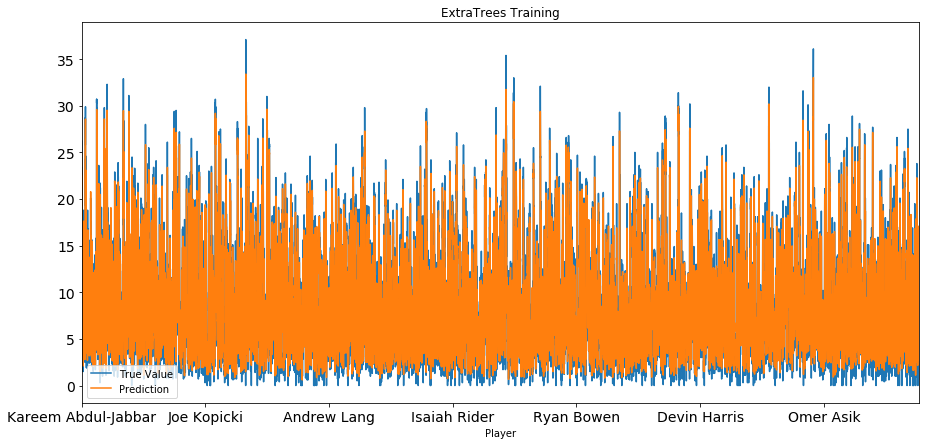

adj train r^2 = 0.964370042945375
train mse = 1.3608301965996767


In [230]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(models[4].predict(train_x3.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))

In [231]:
print('The best players of the 2019-2020 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2019-2020 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Giannis Antetokounmpo,26.8810,1.2573,1.4447,5.7228,11.3223,57.15796
Russell Westbrook,22.4678,0.5246,1.7872,9.9783,10.5857,57.07349
Joel Embiid,26.3955,1.7051,0.7669,3.5193,12.8807,54.54729
James Harden,28.5044,0.5984,1.7326,7.4143,6.3361,54.22217
Anthony Davis,22.5896,2.1255,1.4242,4.0720,11.3576,52.97582
LeBron James,23.6234,0.7807,1.1434,8.0996,8.5581,51.81482
Nikola Jokic,19.7277,0.9450,1.4730,7.1511,10.5380,50.35395
Karl-Anthony Towns,23.9597,1.5079,0.8163,3.3606,11.8011,50.13452
Paul George,26.5166,0.4080,1.7770,3.9143,7.3422,47.75369


In [235]:
data2020 = test_y2
dataend = pd.read_csv('2020Rookies.csv')
dataend = dataend.set_index('Player')
data2020 = data2020.append(dataend)
data2020.tail()

,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Terance Mann,3.95,0.16,0.42,0.90,2.49,10.04
Tremont Waters,4.21,0.09,0.67,1.96,1.25,10.91
Ty Jerome,4.55,0.09,0.47,2.39,1.39,11.47
Tyler Herro,6.64,0.16,0.48,1.68,2.08,13.58
Zion Williamson,14.14,0.78,1.15,1.88,7.10,31.28


In [236]:
data2020.to_csv('2020Preds.csv')

## 2020 - 2021 Predictions

In [238]:
df3 = check[0:len(dfhead)]
df4 = check[len(dfhead):]
df4 = df4.sort_values('Player', ascending=True)
df4['Year'] = df4['Year'] + 1
df4['Age'] = df4['Age'] + 1
df4['PTS'] = test_y2['PTS2']
df4['TRB'] = test_y2['TRB2']
df4['AST'] = test_y2['AST2']
df4['STL'] = test_y2['STL2']
df4['BLK'] = test_y2['BLK2']
dataend = pd.read_csv('NewRookieClass.csv')
dataend = dataend.set_index('Player')
df4 = df4.append(dataend)
df4.tail()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Terance Mann,2020,23.0,3.95,2.49,0.90,0.42,0.16,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
Tremont Waters,2020,22.0,4.21,1.25,1.96,0.67,0.09,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Ty Jerome,2020,22.0,4.55,1.39,2.39,0.47,0.09,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Tyler Herro,2020,20.0,6.64,2.08,1.68,0.48,0.16,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
Zion Williamson,2020,19.0,14.14,7.10,1.88,1.15,0.78,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0


In [176]:
df1 = df3.append(df4)
df1.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,24.8,10.8,4.5,1.0,3.4,1,0,0,0,0,26.2,2.9,0.7,3.4,10.3
Kareem Abdul-Jabbar,1981,33,26.2,10.3,3.4,0.7,2.9,1,0,0,0,0,23.9,2.7,0.8,3.0,8.7
Kareem Abdul-Jabbar,1982,34,23.9,8.7,3.0,0.8,2.7,1,0,0,0,0,21.8,2.2,0.8,2.5,7.5
Kareem Abdul-Jabbar,1983,35,21.8,7.5,2.5,0.8,2.2,1,0,0,0,0,21.5,1.8,0.7,2.6,7.3
Kareem Abdul-Jabbar,1984,36,21.5,7.3,2.6,0.7,1.8,1,0,0,0,0,22.0,2.1,0.8,3.2,7.9


In [177]:
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.891300,1.398062,2.554724,2.647862,1.237851,0.538091,5.447677,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.764691,4.662253,0.008694,0.721331,2.471482
Kareem Abdul-Jabbar,-1.802844,1.653696,2.786065,2.454709,0.669592,-0.086224,4.517891,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.400079,4.283902,0.210459,0.516001,1.871146
Kareem Abdul-Jabbar,-1.714388,1.909330,2.406005,1.836620,0.462952,0.121881,4.145977,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.067173,3.338025,0.210459,0.259338,1.420895
Kareem Abdul-Jabbar,-1.625932,2.164964,2.058994,1.373054,0.204652,0.121881,3.216191,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.019615,2.581323,0.008694,0.310671,1.345853
Kareem Abdul-Jabbar,-1.537475,2.420598,2.009421,1.295792,0.256312,-0.086224,2.472362,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.098878,3.148849,0.210459,0.618666,1.570979


In [178]:
train = df1[0:len(dfhead)]
test = df1[len(dfhead):]
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x = tests[0]
test_y = tests[1]
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Aaron Gordon,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Aaron Holiday,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Abdel Nader,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al Horford,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al-Farouq Aminu,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176


In [179]:
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
    test_y2[col] = scalar.inverse_transform(models[x].predict(test_x.values))

In [180]:
print('The best players of the 2020-2021 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2020-2021 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Giannis Antetokounmpo,26.1297,1.1346,1.4917,5.5341,11.3538,55.93431
Russell Westbrook,20.8521,0.5591,1.7605,9.8758,9.8885,54.49080
Anthony Davis,23.8327,1.8893,1.4137,4.1526,11.3245,53.56000
James Harden,26.3753,0.6241,1.6215,6.8241,6.4597,51.09989
Nikola Jokic,19.5964,1.0044,1.5529,7.0103,10.3869,50.24803
Joel Embiid,24.3679,1.7132,0.7875,3.0776,11.0601,49.75852
LeBron James,22.5432,0.7488,1.2548,7.5337,8.2428,49.74591
Karl-Anthony Towns,23.1708,1.4712,0.8585,3.3823,11.1727,48.64059
Luka Doncic,23.8509,0.4788,1.2450,5.4560,7.8505,46.62690


In [181]:
data2021 = test_y2
data2021.to_csv('2021Preds.csv')

## 2021 - 2022 Predictions

In [182]:
df3 = check[0:len(dfhead)]
df4 = check[len(dfhead):]
df4 = df4.sort_values('Player', ascending=True)
test_y2 = test_y2.sort_values('Player', ascending=True)
df4['Year'] = df4['Year'] + 2
df4['Age'] = df4['Age'] + 2
df4['PTS'] = test_y2['PTS2']
df4['TRB'] = test_y2['TRB2']
df4['AST'] = test_y2['AST2']
df4['STL'] = test_y2['STL2']
df4['BLK'] = test_y2['BLK2']
df4.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Aaron Gordon,2021,25,16.8150,7.5046,3.6923,0.7070,0.5921,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
Aaron Holiday,2021,24,7.5871,2.1379,2.5281,0.5782,0.3213,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Abdel Nader,2021,27,5.4391,2.2015,0.7644,0.4254,0.1645,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Al Horford,2021,34,9.4444,6.0835,3.1540,0.7519,1.0611,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Al-Farouq Aminu,2021,30,7.2930,5.9820,1.3671,0.6467,0.3685,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0


In [183]:
df1 = df3.append(df4)
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.884053,1.385544,2.560042,2.654162,1.240396,0.539054,5.455573,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.764691,4.662253,0.008694,0.721331,2.471482
Kareem Abdul-Jabbar,-1.796091,1.640647,2.791813,2.460650,0.670966,-0.086297,4.524550,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.400079,4.283902,0.210459,0.516001,1.871146
Kareem Abdul-Jabbar,-1.708128,1.895750,2.411047,1.841412,0.463901,0.122153,4.152141,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.067173,3.338025,0.210459,0.259338,1.420895
Kareem Abdul-Jabbar,-1.620166,2.150852,2.063391,1.376983,0.205069,0.122153,3.221118,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.019615,2.581323,0.008694,0.310671,1.345853
Kareem Abdul-Jabbar,-1.532204,2.405955,2.013726,1.299578,0.256835,-0.086297,2.476300,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.098878,3.148849,0.210459,0.618666,1.570979


In [184]:
train = df1[0:len(dfhead)]
test = df1[len(dfhead):]
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x = tests[0]
test_y = tests[1]
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Aaron Gordon,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Aaron Holiday,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Abdel Nader,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al Horford,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al-Farouq Aminu,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176


In [185]:
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
    test_y2[col] = scalar.inverse_transform(models[x].predict(test_x.values))

In [186]:
print('The best players of the 2021-2022 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2021-2022 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Giannis Antetokounmpo,24.8569,0.9217,1.4961,5.2637,11.2156,53.46457
Anthony Davis,23.9928,1.5996,1.4044,4.2001,11.2471,52.80147
Russell Westbrook,19.0021,0.6398,1.7510,9.5758,9.4896,51.92572
James Harden,25.7001,0.6278,1.5541,6.7047,6.2769,49.83513
Nikola Jokic,18.9364,1.0574,1.5803,6.9123,10.4682,49.77979
Joel Embiid,22.5709,1.6990,0.8193,3.2879,11.3112,48.63109
Karl-Anthony Towns,22.8930,1.4410,0.8176,3.3713,11.1636,48.12207
LeBron James,21.1966,0.6968,1.1664,7.2887,7.7001,46.95937
Luka Doncic,24.8504,0.5026,1.3013,5.1913,7.3925,46.92005


In [187]:
data2022 = test_y2
data2022.to_csv('2022Preds.csv')

## 2022 - 2023 Predictions

In [188]:
df3 = check[0:len(dfhead)]
df4 = check[len(dfhead):]
df4 = df4.sort_values('Player', ascending=True)
test_y2 = test_y2.sort_values('Player', ascending=True)
df4['Year'] = df4['Year'] + 3
df4['Age'] = df4['Age'] + 3
df4['PTS'] = test_y2['PTS2']
df4['TRB'] = test_y2['TRB2']
df4['AST'] = test_y2['AST2']
df4['STL'] = test_y2['STL2']
df4['BLK'] = test_y2['BLK2']
df4.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Aaron Gordon,2022,26,16.6013,7.5690,3.7863,0.7078,0.5594,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
Aaron Holiday,2022,25,7.6911,2.2218,2.2655,0.6046,0.3133,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Abdel Nader,2022,28,5.4719,2.1544,0.8139,0.3455,0.1616,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Al Horford,2022,35,7.5617,4.8319,2.6227,0.6582,0.8132,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Al-Farouq Aminu,2022,31,7.1501,4.9627,1.2166,0.5915,0.3476,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0


In [189]:
df1 = df3.append(df4)
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.876423,1.369867,2.563718,2.658164,1.242687,0.540838,5.459515,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.764691,4.662253,0.008694,0.721331,2.471482
Kareem Abdul-Jabbar,-1.788971,1.623846,2.795665,2.464495,0.672569,-0.084972,4.527980,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.400079,4.283902,0.210459,0.516001,1.871146
Kareem Abdul-Jabbar,-1.701519,1.877825,2.414609,1.844754,0.465253,0.123631,4.155366,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.067173,3.338025,0.210459,0.259338,1.420895
Kareem Abdul-Jabbar,-1.614066,2.131804,2.066689,1.379948,0.206108,0.123631,3.223831,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.019615,2.581323,0.008694,0.310671,1.345853
Kareem Abdul-Jabbar,-1.526614,2.385782,2.016986,1.302481,0.257937,-0.084972,2.478603,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.098878,3.148849,0.210459,0.618666,1.570979


In [190]:
train = df1[0:len(dfhead)]
test = df1[len(dfhead):]
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x = tests[0]
test_y = tests[1]
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Aaron Gordon,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Aaron Holiday,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Abdel Nader,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al Horford,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al-Farouq Aminu,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176


In [191]:
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
    test_y2[col] = scalar.inverse_transform(models[x].predict(test_x.values))

In [192]:
print('The best players of the 2022-2023 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2022-2023 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Anthony Davis,23.6886,1.4802,1.3645,4.1967,11.2630,52.03335
Giannis Antetokounmpo,23.3750,0.8822,1.4573,5.1364,11.0937,51.41054
Nikola Jokic,18.0998,1.1469,1.5684,6.9428,10.2856,49.00262
Joel Embiid,23.1048,1.6035,0.8144,3.5499,10.9512,48.82479
Russell Westbrook,16.9666,0.6363,1.7438,9.1730,8.7258,48.33736
Karl-Anthony Towns,22.9079,1.4278,0.8323,3.3455,11.0331,47.94617
James Harden,24.3695,0.6137,1.4453,6.4005,6.2317,47.62529
Luka Doncic,25.3861,0.4742,1.3804,5.1687,7.0090,47.11375
Ben Simmons,17.8121,0.6349,1.6502,7.9766,7.3194,45.41558


In [193]:
data2023 = test_y2
data2023.to_csv('2023Preds.csv')

## 2023 - 2024 Predictions

In [194]:
df3 = check[0:len(dfhead)]
df4 = check[len(dfhead):]
df4 = df4.sort_values('Player', ascending=True)
test_y2 = test_y2.sort_values('Player', ascending=True)
df4['Year'] = df4['Year'] + 4
df4['Age'] = df4['Age'] + 4
df4['PTS'] = test_y2['PTS2']
df4['TRB'] = test_y2['TRB2']
df4['AST'] = test_y2['AST2']
df4['STL'] = test_y2['STL2']
df4['BLK'] = test_y2['BLK2']
df4.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Aaron Gordon,2023,27,16.4179,7.4079,3.6331,0.7330,0.5277,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
Aaron Holiday,2023,26,7.5730,2.1969,2.3165,0.6473,0.3112,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Abdel Nader,2023,29,5.4639,2.1378,0.8732,0.3533,0.1746,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Al Horford,2023,36,5.5783,3.8387,2.0508,0.5261,0.6550,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Al-Farouq Aminu,2023,32,6.7993,4.4143,1.0772,0.4903,0.3232,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0


In [195]:
df1 = df3.append(df4)
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.868431,1.351225,2.567051,2.661430,1.245232,0.542859,5.462698,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.764691,4.662253,0.008694,0.721331,2.471482
Kareem Abdul-Jabbar,-1.781504,1.603510,2.799058,2.467691,0.674629,-0.083012,4.530821,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.400079,4.283902,0.210459,0.516001,1.871146
Kareem Abdul-Jabbar,-1.694577,1.855795,2.417904,1.847724,0.467137,0.125611,4.158070,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.067173,3.338025,0.210459,0.259338,1.420895
Kareem Abdul-Jabbar,-1.607650,2.108080,2.069894,1.382750,0.207772,0.125611,3.226193,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.019615,2.581323,0.008694,0.310671,1.345853
Kareem Abdul-Jabbar,-1.520723,2.360365,2.020179,1.305254,0.259645,-0.083012,2.480692,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.098878,3.148849,0.210459,0.618666,1.570979


In [196]:
train = df1[0:len(dfhead)]
test = df1[len(dfhead):]
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x = tests[0]
test_y = tests[1]
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Aaron Gordon,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Aaron Holiday,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Abdel Nader,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al Horford,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al-Farouq Aminu,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176


In [197]:
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
    test_y2[col] = scalar.inverse_transform(models[x].predict(test_x.values))

In [198]:
print('The best players of the 2023-2024 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2023-2024 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Anthony Davis,23.6922,1.3114,1.3153,4.1602,11.2041,51.25752
Giannis Antetokounmpo,22.8515,0.8509,1.3999,5.0788,11.0620,50.49650
Nikola Jokic,17.4676,1.1325,1.5684,6.9261,10.0220,47.98585
Karl-Anthony Towns,22.7647,1.3991,0.8118,3.4445,10.9658,47.72311
Joel Embiid,22.7492,1.4901,0.8073,3.1613,10.9881,47.56907
Luka Doncic,25.7133,0.4902,1.4754,5.1798,6.2666,46.89972
Russell Westbrook,15.8039,0.6210,1.7111,8.7034,7.7923,45.20606
James Harden,23.1555,0.6186,1.3336,5.9062,6.0332,45.11124
Ben Simmons,17.6866,0.6014,1.6440,7.8742,7.1855,44.85670


In [199]:
data2024 = test_y2
data2024.to_csv('2024Preds.csv')

# Overall Summery

In [200]:
pl1 = pd.read_csv('2020Preds.csv')
pl1['Year'] = 2020
pl2 = pd.read_csv('2021Preds.csv')
pl2['Year'] = 2021
pl3 = pd.read_csv('2022Preds.csv')
pl3['Year'] = 2022
pl4 = pd.read_csv('2023Preds.csv')
pl4['Year'] = 2023
pl5 = pd.read_csv('2024Preds.csv')
pl5['Year'] = 2024
pl5.head()

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year
0,Aaron Gordon,16.9535,0.4902,0.7545,3.4083,7.1450,34.37405,2024
1,Aaron Holiday,7.6570,0.2993,0.6335,2.2857,2.2507,16.58479,2024
2,Abdel Nader,5.6045,0.1892,0.3614,0.8796,2.0331,11.01542,2024
3,Al Horford,3.9158,0.5727,0.3937,1.6805,3.1700,13.13975,2024
4,Al-Farouq Aminu,5.3908,0.2855,0.3648,0.8147,3.5443,12.81691,2024


In [201]:
dftail = pd.read_csv('NBAFuturesTest1.csv')
dftail['PTS2'] = dftail['PTS']
dftail['BLK2'] = dftail['BLK']
dftail['STL2'] = dftail['STL']
dftail['AST2'] = dftail['AST']
dftail['TRB2'] = dftail['TRB']
dftail = dftail[['Player','PTS2','BLK2','STL2','AST2','TRB2']]
dftail['Value'] = 1*dftail['PTS2'] + 1.2*dftail['TRB2'] + 1.5*dftail['AST2'] + 3*dftail['STL2'] + 3*dftail['BLK2']
dftail['Year'] = 2019
dftail = dftail.sort_values('Player', ascending=True)

In [202]:
total = dftail.append(pl1)
total = total.append(pl2)
total = total.append(pl3)
total = total.append(pl4)
total = total.append(pl5)
#total = total.sort_values('Player', ascending=True)

In [203]:
total[total['Player'] == 'James Harden']

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year
205,James Harden,36.1000,0.7000,2.0000,7.5000,6.6000,63.37000,2019
205,James Harden,28.5766,0.5843,1.7033,7.3476,6.3778,54.11416,2020
225,James Harden,26.3753,0.6241,1.6215,6.8241,6.4597,51.09989,2021
225,James Harden,25.7001,0.6278,1.5541,6.7047,6.2769,49.83513,2022
225,James Harden,24.3695,0.6137,1.4453,6.4005,6.2317,47.62529,2023
225,James Harden,23.1555,0.6186,1.3336,5.9062,6.0332,45.11124,2024


In [204]:
total.to_csv('5YearPreds2.csv')

In [205]:
dftail = dftail.sort_values('Value', ascending=False)
pl5 = pl5.sort_values('Value', ascending=False)
dftail['Rank'] = range(len(dftail))
pl5['Rank'] = range(len(pl5))
dftail = dftail.sort_values('Player', ascending=True)
pl5 = pl5.sort_values('Player', ascending=True)

In [206]:
pl5['RankOld'] = dftail['Rank'].values
pl5.head()

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld
0,Aaron Gordon,16.9535,0.4902,0.7545,3.4083,7.1450,34.37405,2024,28,55
1,Aaron Holiday,7.6570,0.2993,0.6335,2.2857,2.2507,16.58479,2024,191,357
2,Abdel Nader,5.6045,0.1892,0.3614,0.8796,2.0331,11.01542,2024,413,435
3,Al Horford,3.9158,0.5727,0.3937,1.6805,3.1700,13.13975,2024,328,57
4,Al-Farouq Aminu,5.3908,0.2855,0.3648,0.8147,3.5443,12.81691,2024,338,155


In [207]:
pl5['Jump'] = (np.sqrt(pl5['RankOld']+1))/(np.sqrt(pl5['Rank']+1))
fyd = pl5.sort_values('Jump', ascending=False)
fyd.head(20)

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump
513,Wendell Carter,17.5216,1.1136,0.6301,2.6539,7.5010,35.73475,2024,20,123,2.429972
490,Troy Brown,10.3025,0.4289,0.7277,3.2812,4.0268,23.52626,2024,73,364,2.220908
528,Zhaire Smith,10.6575,0.3303,0.8370,3.4461,3.1276,23.08167,2024,76,320,2.041772
306,Kevin Knox,18.8333,0.5118,0.8010,2.1298,4.6681,31.56812,2024,41,172,2.029544
26,Anthony Davis,23.6922,1.3114,1.3153,4.1602,11.2041,51.25752,2024,0,3,2.000000
336,Luka Doncic,25.7133,0.4902,1.4754,5.1798,6.2666,46.89972,2024,5,23,2.000000
112,Deandre Ayton,18.2488,1.1944,0.8212,2.7934,10.5048,41.09146,2024,10,43,2.000000
444,Shai Gilgeous-Alexander,16.6569,0.3429,1.0751,4.8526,3.1453,31.96416,2024,39,148,1.930026
472,Thomas Welsh,7.7929,0.7322,0.4880,1.0668,4.1764,18.06538,2024,143,513,1.889297
195,Ike Anigbogu,6.5553,0.8228,0.5416,1.1999,4.5269,17.88063,2024,147,517,1.870829


In [208]:
pos = pd.read_csv('NBAFuturesTest1.csv')
pos = pos[['Player', 'Pos']]
imp = fyd.merge(pos, left_on='Player', right_on='Player')
imp.head()

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
0,Wendell Carter,17.5216,1.1136,0.6301,2.6539,7.5010,35.73475,2024,20,123,2.429972,C
1,Troy Brown,10.3025,0.4289,0.7277,3.2812,4.0268,23.52626,2024,73,364,2.220908,SF
2,Zhaire Smith,10.6575,0.3303,0.8370,3.4461,3.1276,23.08167,2024,76,320,2.041772,SG
3,Kevin Knox,18.8333,0.5118,0.8010,2.1298,4.6681,31.56812,2024,41,172,2.029544,PF
4,Anthony Davis,23.6922,1.3114,1.3153,4.1602,11.2041,51.25752,2024,0,3,2.000000,C


In [209]:
imp = imp.set_index('Player')

In [210]:
print('Most Improved PG:')
imp[imp['Pos'] == 'PG'].head(15)

Most Improved PG:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Shai Gilgeous-Alexander,16.6569,0.3429,1.0751,4.8526,3.1453,31.96416,2024,39,148,1.930026,PG
Chris Chiozza,7.4144,0.0877,0.7530,3.5530,2.0683,17.74796,2024,151,508,1.829941,PG
Isaac Bonga,8.9454,0.3008,0.6862,2.1089,2.2120,17.72415,2024,153,480,1.767308,PG
Jevon Carter,8.4522,0.2440,0.8320,3.4249,2.2330,19.49715,2024,117,356,1.739375,PG
Edmond Sumner,8.2183,0.2648,0.8229,2.3244,2.3326,17.76712,2024,150,455,1.737777,PG
Kobi Simmons,7.1496,0.1138,0.7116,3.3656,1.9240,16.98300,2024,176,527,1.727151,PG
Dennis Smith,17.0844,0.3410,1.0999,5.5187,3.5281,33.91887,2024,34,99,1.690309,PG
Troy Caupain,7.3265,0.1049,0.7632,3.2372,1.9832,17.16644,2024,169,470,1.664508,PG
Collin Sexton,16.8222,0.1509,0.8376,4.6861,2.4118,29.71101,2024,48,127,1.616244,PG


In [211]:
print('Most Improved SG:')
imp[imp['Pos'] == 'SG'].head(15)

Most Improved SG:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Zhaire Smith,10.6575,0.3303,0.8370,3.4461,3.1276,23.08167,2024,76,320,2.041772,SG
Luka Doncic,25.7133,0.4902,1.4754,5.1798,6.2666,46.89972,2024,5,23,2.000000,SG
Kevin Huerter,14.3812,0.4003,0.9594,3.4978,4.4136,29.00332,2024,52,182,1.858179,SG
Gary Trent,10.0377,0.2022,0.5385,1.4883,2.8493,17.91141,2024,146,491,1.829464,SG
Malik Monk,10.4338,0.3173,0.8016,3.1564,3.0975,22.24210,2024,83,274,1.809367,SG
Anfernee Simons,8.7670,0.1781,0.7614,2.0058,2.7344,17.87548,2024,148,469,1.776052,SG
Landry Shamet,9.8375,0.1705,0.7463,3.6428,2.0587,20.52254,2024,103,289,1.669869,SG
Malachi Richardson,8.8249,0.1599,0.5704,1.9022,2.1686,16.47142,2024,193,519,1.637196,SG
PJ Dozier,9.2280,0.2384,0.6088,1.6300,2.7419,17.50488,2024,158,424,1.634918,SG


In [212]:
print('Most Improved SF:')
imp[imp['Pos'] == 'SF'].head(15)

Most Improved SF:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Troy Brown,10.3025,0.4289,0.7277,3.2812,4.0268,23.52626,2024,73,364,2.220908,SF
OG Anunoby,10.2848,0.4388,0.8763,1.4430,4.1934,21.42668,2024,95,300,1.770711,SF
Jayson Tatum,18.1676,0.6442,1.0744,2.6606,6.0149,34.53218,2024,26,77,1.699673,SF
Derrick Jones,9.8709,0.6745,0.8847,1.5085,4.3216,21.99717,2024,87,246,1.675356,SF
Stanley Johnson,9.7323,0.3182,0.8548,1.9482,3.5955,20.48820,2024,104,268,1.600595,SF
Mikal Bridges,10.9979,0.3110,0.9135,2.7789,3.9592,23.59079,2024,72,183,1.587623,SF
Rodions Kurucs,9.0499,0.7367,0.9169,1.5165,4.4005,21.56605,2024,94,238,1.586124,SF
Miles Bridges,8.8092,0.6672,0.8574,1.4687,4.6973,21.22281,2024,96,229,1.539849,SF
B.J. Johnson,6.4991,0.3086,0.9413,1.6260,2.9646,16.24532,2024,200,475,1.538882,SF


In [213]:
print('Most Improved PF:')
imp[imp['Pos'] == 'PF'].head(15)

Most Improved PF:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Kevin Knox,18.8333,0.5118,0.8010,2.1298,4.6681,31.56812,2024,41,172,2.029544,PF
Marvin Bagley,17.9378,0.7173,0.7978,2.0851,7.4530,34.55435,2024,25,89,1.860521,PF
Jaren Jackson,18.5238,1.0239,0.7934,2.2343,4.6501,32.90727,2024,38,116,1.732051,PF
Ray Spalding,9.6604,0.5441,0.4297,1.0785,4.2957,19.35439,2024,121,354,1.705824,PF
Harry Giles,9.1877,0.5493,0.4840,1.2428,4.0446,19.00532,2024,126,261,1.436312,PF
Jarred Vanderbilt,6.4393,0.3856,0.5009,0.7702,4.2227,15.32134,2024,246,484,1.401272,PF
Aaron Gordon,16.9535,0.4902,0.7545,3.4083,7.1450,34.37405,2024,28,55,1.389617,PF
Christian Wood,8.7846,0.5579,0.3879,1.0526,3.7294,17.67618,2024,155,272,1.322876,PF
Isaiah Hartenstein,5.3028,0.5691,0.4406,0.8129,4.4767,14.92329,2024,269,456,1.300997,PF


In [214]:
print('Most Improved C:')
imp[imp['Pos'] == 'C'].head(15)

Most Improved C:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Wendell Carter,17.5216,1.1136,0.6301,2.6539,7.5010,35.73475,2024,20,123,2.429972,C
Anthony Davis,23.6922,1.3114,1.3153,4.1602,11.2041,51.25752,2024,0,3,2.000000,C
Deandre Ayton,18.2488,1.1944,0.8212,2.7934,10.5048,41.09146,2024,10,43,2.000000,C
Thomas Welsh,7.7929,0.7322,0.4880,1.0668,4.1764,18.06538,2024,143,513,1.889297,C
Ike Anigbogu,6.5553,0.8228,0.5416,1.1999,4.5269,17.88063,2024,147,517,1.870829,C
Mohamed Bamba,9.5415,0.9933,0.5619,1.0561,7.2467,24.48729,2024,69,225,1.796823,C
Nikola Jokic,17.4676,1.1325,1.5684,6.9261,10.0220,47.98585,2024,2,8,1.732051,C
Mitchell Robinson,12.6837,1.8626,0.6387,1.4823,7.4891,31.39797,2024,44,134,1.732051,C
Moritz Wagner,7.3651,0.8044,0.5677,1.0190,4.8089,18.78058,2024,134,400,1.723476,C
